# COOKS

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby

In [2]:
############## HELPERS FUNCTION ###############

#DESCRIBE GENDER
def tellMeFemaleStats(df): 
    female_users = df[df.gender == 'female']
    female_users_stats = df[df.gender == 'female'].users.sum()
    print('female users: ', female_users_stats, ' which is {}'.format((female_users_stats/df.users.sum())*100), 'of all users')
    return female_users

def tellMeMaleStats(df): 
    male_users = df[df.gender == 'male']
    male_users_stats = df[df.gender == 'male'].users.sum()
    print('male users in: ', male_users_stats, ' which is {}'.format((male_users_stats/df.users.sum())*100), 'of all users')
    return male_users
        
#DESCRIBE AGE
def tellMeAgeStats(df, agegroup): 
    age_group = df[df.age == agegroup]
    age_group_stats = df[df.age == agegroup].users.sum()
    print('Users in their', agegroup, 'totaled to:', age_group_stats, ' which is {}'.format((age_group_stats/df.users.sum())*100), 'of all users')
    return age_group

# CALCULATE TAG FREQUENCY
def getFreqOut(dataframe):
    total_tags = getTags(dataframe.tag)
    unique_tags = getUniqueWords(total_tags)

    print ('# Tags: ', len(total_tags))
    print ('# Unique Tags: ', len(unique_tags))

    #Count how many times each tag appears on the list
    unique_tags_list, counts = np.unique(total_tags, return_counts=True)
    unique_tag_count = dict(zip(unique_tags_list, counts))

    #Put them to Dataframe
    tag_freq = pd.DataFrame.from_dict(unique_tag_count, orient='index').reset_index()
    tag_freq.columns = ['tags', 'counts']

    #Calculate Tag Frequency
    total_tag_frequency = np.sum(tag_freq.counts)
    tag_freq['tag_freq'] = (tag_freq.counts / total_tag_frequency)

    #Sort them
    tag_freq = tag_freq.sort_values('tag_freq', ascending=False)
    
    return tag_freq #returns dataframe

## Analyse Base Users

In [4]:
all_users = (pd.read_csv('combined_clean.csv', comment = '#').dropna())
all_users.tag = all_users.tag.str.split(',')

In [5]:
## DESCRIBE
def tellMeStats(df):
    total_users = np.sum(df.users)
    total_new_users = np.sum(df.new_users)
    total_returning_users = total_users - total_new_users

    print ('Total Users: ', total_users,
           '\nTotal New Users:', total_new_users,
           '\nTotal Returning Users:', total_returning_users)
    
tellMeStats(all_users)

Total Users:  1839917094 
Total New Users: 233168346 
Total Returning Users: 1606748748


In [6]:
all_users.columns

Index(['affinity', 'sub_cat', 'sub_sub_cat', 'tag', 'age', 'users',
       'new_users', 'avg_time_on_page', 'gender'],
      dtype='object')

In [7]:
#Group them together! 
grouped_by_cooks = all_users.groupby('affinity').users.sum()
grouped_by_cooks.index

Index(['(other)', 'banking & finance/avid investors',
       'beauty & wellness/beauty mavens',
       'beauty & wellness/frequently visits salons',
       'food & dining/coffee shop regulars',
       'food & dining/cooking enthusiasts',
       'food & dining/cooking enthusiasts/30 minute chefs',
       'food & dining/cooking enthusiasts/aspiring chefs',
       'food & dining/fast food cravers', 'food & dining/foodies',
       ...
       'travel/business travelers', 'travel/travel buffs',
       'travel/travel buffs/beachbound travelers',
       'travel/travel buffs/family vacationers',
       'travel/travel buffs/luxury travelers',
       'travel/travel buffs/snowbound travelers',
       'vehicles & transportation/auto enthusiasts',
       'vehicles & transportation/auto enthusiasts/motorcycle enthusiasts',
       'vehicles & transportation/auto enthusiasts/performance & luxury vehicle enthusiasts',
       'vehicles & transportation/auto enthusiasts/truck & suv enthusiasts'],
      dt

In [11]:
#Subset to test - Code Works! 
test_set = all_users.sample(1000)
test_freq = getFreqOut(test_set)
test_freq.head()

# Tags:  3455
# Unique Tags:  2363


,tags,counts,tag_freq
11,bola.com,26,0.007525
1405,manchester united,22,0.006368
1734,merdeka.com,21,0.006078
882,persib bandung,18,0.005210
121,mu,17,0.004920


In [8]:
%%time
# GET ALL TAGS

all_tags = [] 
for li in all_users.tag:
    for word in li:
        all_tags.append(word)

unique_tags = list(set(all_tags))

CPU times: user 28.7 s, sys: 382 ms, total: 29.1 s
Wall time: 29.4 s


In [9]:
print ('# Tags: ', len(all_tags))
print ('# Unique Tags: ', len(unique_tags))

# Tags:  51258446
# Unique Tags:  74346


In [ ]:
#Count how many times each tag appears on the list
unique_tags_list, counts = np.unique(all_tags, return_counts=True)
unique_tag_count = dict(zip(unique_tags_list, counts))

In [ ]:
#Put them to Dataframe
tag_freq = pd.DataFrame.from_dict(unique_tag_count, orient='index').reset_index()
tag_freq.columns = ['tags', 'counts']

#Calculate Tag Frequency
total_tag_frequency = np.sum(tag_freq.counts)
tag_freq['tag_freq'] = (tag_freq.counts / total_tag_frequency)

#Sort them
tag_freq = tag_freq.sort_values('tag_freq', ascending=False)

In [ ]:
all_tag_freq.to_csv('all_frequency_table.csv', index= None, header=True)

### EDA ON BASE USERS

In [ ]:
#Find distribution on keywords -- see if it's skewed
#Find distribution of sub category or sub sub category
#Find distribution of users by gender and age

In [ ]:
#Find distribution on keywords -- see if it's skewed
x = all_users.tags
y = all_users.counts

_ = plt.figure(figsize=(16,8))
_ = sns.barplot(x, y, color='blue')
_ = plt.title('Count Distribution of Keywords', fontsize=15)
_ = plt.ylabel('Keywords', fontsize=12)
_ = plt.xlabel('Count', fontsize=12)
_ = plt.xticks(rotation='vertical')

In [ ]:
#Distribution of affinity category vs article sub category

affinity_v_category = all_users[['affinity', 'sub_cat', 'users']]
x = affinity_v_category.affinity
y = affinity_v_category.users
hue = affinity_v_category.sub_cat

_ = plt.figure(figsize=(14,8))
_ = sns.barplot(x, y, hue=hue, palette='bright')
_ = plt.title('Distribution of affinity category vs article sub category', fontsize=15)
_ = plt.ylabel('count of users', fontsize=12)
_ = plt.xlabel('affinity', fontsize=12)

In [ ]:
#Distribution of affinity category vs article sub sub category

affinity_v_category = all_users[['affinity', 'sub_sub_cat', 'users']]
x = affinity_v_category.affinity
y = affinity_v_category.users
hue = affinity_v_category.sub_sub_cat

_ = plt.figure(figsize=(14,8))
_ = sns.barplot(x, y, hue=hue, palette='bright')
_ = plt.title('Distribution of affinity category vs article sub sub category', fontsize=15)
_ = plt.ylabel('count of users', fontsize=12)
_ = plt.xlabel('affinity', fontsize=12)

In [ ]:
#Find distribution of users by gender and age

age_v_gender = all_users[['age', 'gender', 'users']]
x = age_v_gender.age
y = age_v_gender.users
hue = age_v_gender.gender

_ = plt.figure(figsize=(14,8))
_ = sns.barplot(x, y, hue=hue, palette='bright')
_ = plt.title('Distribution age v gender', fontsize=15)
_ = plt.ylabel('count of users', fontsize=12)
_ = plt.xlabel('age group', fontsize=12)

### EDA ON SEGMENTED USERS

In [ ]:
#Scatter plot of frequency by affinity



## FIND OUT WHO COOKS ARE

<br>Total Users:  27,340,176

<p># Tags:  36430
<br># Unique Tags:  3063

In [47]:
#Find out who the shoppers are! 

cooks_group = grouped_by_cooks[grouped_by_cooks.index.str.contains('cook')]
cooks_group

affinity
food & dining/cooking enthusiasts                     2154486
food & dining/cooking enthusiasts/30 minute chefs    21999452
food & dining/cooking enthusiasts/aspiring chefs      3186238
Name: users, dtype: int64

In [50]:
all_cooks = all_users[all_users.affinity.str.contains('cook')]
tellMeStats(all_cooks)

Total Users:  27340176


In [51]:
cooks_segmented_sum = all_cooks.groupby(['sub_cat', 'sub_sub_cat']).users.sum()
cooks_segmented_sum.sort_values(ascending=False)

sub_cat         sub_sub_cat     
showbiz         celeb               11704222
news            peristiwa            2888442
global          unik                 1516545
health          health-info           922516
lifestyle       life                  798016
global          internasional         733011
citizen6        hits                  718109
health          seks                  490843
regional        semarang              440502
bisnis          ekonomi               394640
showbiz         kpop                  389807
bisnis          cpns                  356159
regional        palembang             355138
global          sains                 320137
showbiz         blink-blink           310425
tekno           berita                297672
global          histori               279328
news            politik               268927
lifestyle       kuliner               264381
news            rajut                 251353
regional        makassar              246763
otomotif        oto-ne

In [52]:
all_cooks.sub_sub_cat.value_counts()

celeb                  4290
peristiwa              1383
unik                    513
internasional           335
health-info             335
life                    304
hits                    264
seks                    244
ekonomi                 218
cpns                    181
semarang                164
palembang               159
blink-blink             153
politik                 143
liga-nasional           140
bandung                 123
berita                  121
oto-news                119
kpop                    113
hollywood               110
rajut                   105
sains                   101
tips-trik                95
makassar                 87
gadget                   87
kuliner                  87
surabaya                 87
histori                  82
feed                     65
liga-internasional       53
                       ... 
bollywood                16
home-decor               15
cahaya-hati              14
corner                   14
infografis          

In [54]:
#Get Tag Frequency
cooks_tag_freq = getFreqOut(all_cooks)
cooks_tag_freq

# Tags:  36463
# Unique Tags:  4358


,tags,counts,tag_freq
4263,dream.co.id,518,0.014206
2077,raja organic,344,0.009434
754,kapanlagi.com,309,0.008474
2211,maia estianty,268,0.007350
2975,tsunami anyer,255,0.006993
271,jokowi,237,0.006500
993,putri diana,222,0.006088
1163,lion air,220,0.006034
984,tsunami selat sunda,218,0.005979
3592,irwan mussry,194,0.005320


In [55]:
#Merge cooks tag with all tag
cooks_tag_table = cooks_tag_freq.merge(all_tag_freq, how='right', on='tags').dropna()
cooks_tag_table.columns = 'tags', 'count_segmented', 'freq_segmented', 'count_all', 'freq_all'
cooks_tag_table

,tags,count_segmented,freq_segmented,count_all,freq_all
0,dream.co.id,518.0,0.014206,6326,0.012638
1,raja organic,344.0,0.009434,6116,0.012219
2,kapanlagi.com,309.0,0.008474,3318,0.006629
3,maia estianty,268.0,0.007350,3084,0.006161
4,tsunami anyer,255.0,0.006993,3158,0.006309
5,jokowi,237.0,0.006500,2791,0.005576
6,putri diana,222.0,0.006088,2488,0.004971
7,lion air,220.0,0.006034,3136,0.006265
8,tsunami selat sunda,218.0,0.005979,2720,0.005434
9,irwan mussry,194.0,0.005320,2244,0.004483


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


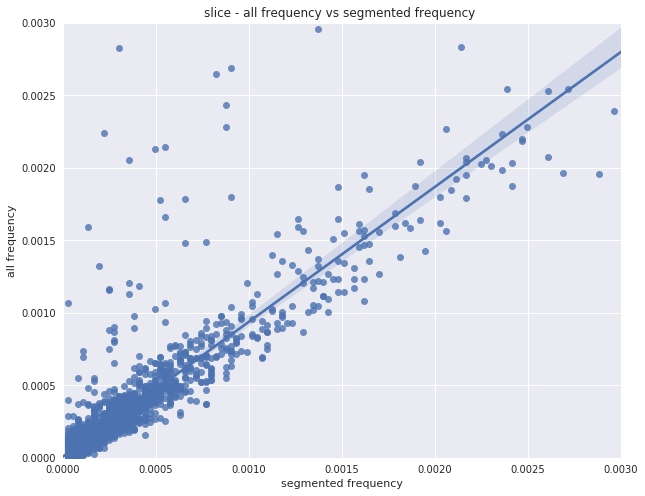

In [56]:
#Maybe we can slice the table to have a better look

x = 'freq_segmented'
y = 'freq_all'

plt.figure(figsize=(10,8))
ax = sns.regplot(x,y, data = cooks_tag_table)

plt.title ('slice - all frequency vs segmented frequency ')
plt.xlabel ('segmented frequency')
plt.ylabel ('all frequency')
plt.ylim(bottom = 0, top =0.003)
plt.xlim(left = 0, right=0.003)

plt.show()

In [57]:
#Let's check spearman correlation
from scipy import stats

print(stats.pearsonr(cooks_tag_table.freq_all, cooks_tag_table.freq_segmented))

mspearmancorr, pvalue = stats.spearmanr(cooks_tag_table.freq_all, cooks_tag_table.freq_segmented)
mspearmancorr, pvalue

(0.9610577986902716, 0.0)


(0.8953342812844526, 0.0)

In [58]:
#Set Threshold

#Set threshold above average = noisy. 
all_tag_freq['noise'] = [1 if i >= np.mean(all_tag_freq.tag_freq) else 0 for i in all_tag_freq.tag_freq]
all_noise = all_tag_freq[all_tag_freq.noise == 1].tags.tolist()
cooks_tag_table['noise'] = [1 if i in all_noise else 0 for i in cooks_tag_table.tags]

In [59]:
cooks_signal_table = cooks_tag_table[cooks_tag_table.noise == 0]
cooks_signal_table

,tags,count_segmented,freq_segmented,count_all,freq_all,noise
843,dian pramana poetra meninggal,10.0,0.000274,76,0.000152,0
870,dian pramana poetra meninggal dunia,10.0,0.000274,76,0.000152,0
871,nita octobijanthy,10.0,0.000274,68,0.000136,0
881,jan ethes srinarendra,10.0,0.000274,79,0.000158,0
906,penerbangan,9.0,0.000247,77,0.000154,0
918,gisella anastasia bercerai,9.0,0.000247,63,0.000126,0
930,suhana khan,9.0,0.000247,68,0.000136,0
943,ashraf sinclair,9.0,0.000247,77,0.000154,0
978,tes cpns 2018,9.0,0.000247,79,0.000158,0
982,anandito dwi sepdiawan,8.0,0.000219,75,0.000150,0


In [60]:
#Try using IQR
all_tag_freq_iqr = all_tag_freq.copy()
high_freq, low_freq = np.percentile(all_tag_freq_iqr.tag_freq, [75 ,25])
all_tag_freq_iqr['noise'] = [1 if i >= high_freq else 2 if i <= low_freq else 0 for i in all_tag_freq_iqr.tag_freq]
all_signal = all_tag_freq[all_tag_freq_iqr.noise == 0].tags.tolist()

In [61]:
cooks_tag_table['signal_iqr'] = [1 if i in all_signal else 0 for i in cooks_tag_table.tags]

In [62]:
cooks_signal_table_iqr = cooks_tag_table[cooks_tag_table.signal_iqr == 1]
cooks_signal_table_iqr

,tags,count_segmented,freq_segmented,count_all,freq_all,noise,signal_iqr
918,gisella anastasia bercerai,9.0,0.000247,63,0.000126,0,1
1019,lapan,8.0,0.000219,51,0.000102,0,1
1035,faldy albar meninggal,8.0,0.000219,35,0.000070,0,1
1042,lady di,8.0,0.000219,55,0.000110,0,1
1044,dian pramana poetra sakit,8.0,0.000219,63,0.000126,0,1
1056,lion air 610,8.0,0.000219,56,0.000112,0,1
1081,hotman paris hutapea,8.0,0.000219,65,0.000130,0,1
1085,bpom,8.0,0.000219,60,0.000120,0,1
1092,aming,8.0,0.000219,60,0.000120,0,1
1099,nick van der velden,7.0,0.000192,64,0.000128,0,1


### USE SEGMENTED DATA

In [64]:
segmented_cooks = all_cooks[all_cooks.sub_sub_cat == 'kuliner']

#Get Tag Frequency
scooks_tag_freq = getFreqOut(segmented_cooks)

sall_tag_freq = all_tag_freq.drop('noise', axis=1)

#Merge shoppers tag with all tag
scooks_tag_table = scooks_tag_freq.merge(sall_tag_freq, how='right', on='tags').dropna()
scooks_tag_table.columns = 'tags', 'count_segmented', 'freq_segmented', 'count_all', 'freq_all'
scooks_tag_table

# Tags:  176
# Unique Tags:  43


,tags,count_segmented,freq_segmented,count_all,freq_all
0,raja organic,49.0,0.278409,6116,0.012219
1,makanan,11.0,0.062500,413,0.000825
2,kuliner,10.0,0.056818,135,0.000270
3,clarissa wang,6.0,0.034091,90,0.000180
4,jusup maruta cayadi,6.0,0.034091,90,0.000180
5,crazy rich surabayan,6.0,0.034091,104,0.000208
6,makanan berbahaya,5.0,0.028409,104,0.000208
7,kulkas,5.0,0.028409,47,0.000094
8,anak-anak,5.0,0.028409,64,0.000128
9,makanan berbahaya bagi anak-anak,5.0,0.028409,59,0.000118


In [65]:
#Let's check spearman correlation
from scipy import stats

print('pearson corr: ', stats.pearsonr(scooks_tag_table.freq_all, scooks_tag_table.freq_segmented))

mspearmancorr, pvalue = stats.spearmanr(scooks_tag_table.freq_all, scooks_tag_table.freq_segmented)
print('spearman corr: ', mspearmancorr, pvalue)

pearson corr:  (0.9568097102518398, 1.2981013055871973e-23)
spearman corr:  0.7143609443550948 7.466459376278535e-08


In [72]:
scooks_tag_table['signal_iqr'] = [1 if i in all_signal else 0 for i in scooks_tag_table.tags]
scooks_signal_table_iqr = scooks_tag_table[scooks_tag_table.signal_iqr == 1]
scooks_signal_table_iqr

,tags,count_segmented,freq_segmented,count_all,freq_all,noise,signal_iqr
7,kulkas,5.0,0.028409,47,0.000094,0,1
8,anak-anak,5.0,0.028409,64,0.000128,0,1
9,makanan berbahaya bagi anak-anak,5.0,0.028409,59,0.000118,0,1
10,makanan dan minuman,5.0,0.028409,37,0.000074,0,1
11,lemari es,5.0,0.028409,25,0.000050,0,1
12,minahasa,3.0,0.017045,35,0.000070,0,1
13,resep menu sahur,3.0,0.017045,12,0.000024,0,1
14,kuliner ekstrem,3.0,0.017045,35,0.000070,0,1
15,tahu goreng,3.0,0.017045,12,0.000024,0,1
17,pasar tomohon,3.0,0.017045,35,0.000070,0,1


In [76]:
top_cook_tags = scooks_tag_table.tags[:15].tolist()
top_cook_tags

['raja organic',
 'makanan',
 'kuliner',
 'clarissa wang',
 'jusup maruta cayadi',
 'crazy rich surabayan',
 'makanan berbahaya',
 'kulkas',
 'anak-anak',
 'makanan berbahaya bagi anak-anak',
 'makanan dan minuman',
 'lemari es',
 'minahasa',
 'resep menu sahur',
 'kuliner ekstrem']

# Test Data for Accuracy